In [1]:
# Problem Statement
# classify the Size_Categorie using SVM

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# reading csv file
data=pd.read_csv('forestfires.csv')

In [4]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [5]:
data.shape

(517, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data1=data.drop(['dayfri','daymon' ,'daysat' ,'daysun' ,'daythu' ,'daytue' ,'daywed'],axis=1)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  monthapr       517 non-null    int64  
 12  monthaug       517 non-null    int64  
 13  monthdec       517 non-null    int64  
 14  monthfeb       517 non-null    int64  
 15  monthjan       517 non-null    int64  
 16  monthjul       517 non-null    int64  
 17  monthjun       517 non-null    int64  
 18  monthmar  

In [9]:
data2=data1.drop(['monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [10]:
data2.shape

(517, 12)

In [11]:
data2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
data2[data2.duplicated()]    # no duplicates

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [13]:
# Label Encoding
label_encoder=preprocessing.LabelEncoder()
data2['month']=label_encoder.fit_transform(data2['month'])
data2['day']=label_encoder.fit_transform(data2['day'])
data2['size_category']=label_encoder.fit_transform(data2['size_category'])

In [14]:
data2.tail(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1
516,9,5,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,1


In [15]:
data2.info()     #datatype converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 42.5 KB


In [16]:
cor=data2.corr()
cor

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


## Visualization

<Axes: >

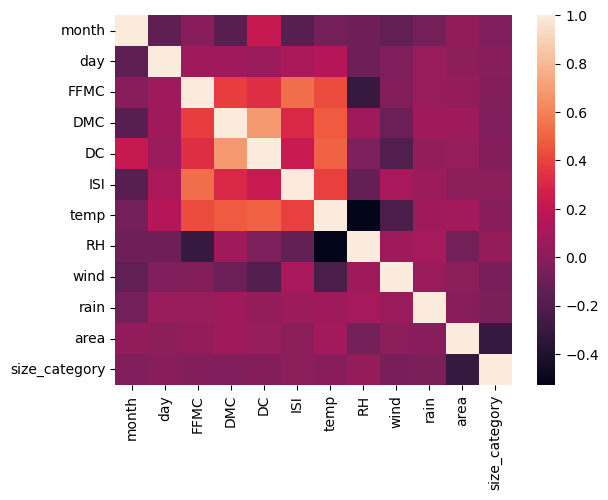

In [17]:
sns.heatmap(cor)   # no high correlations

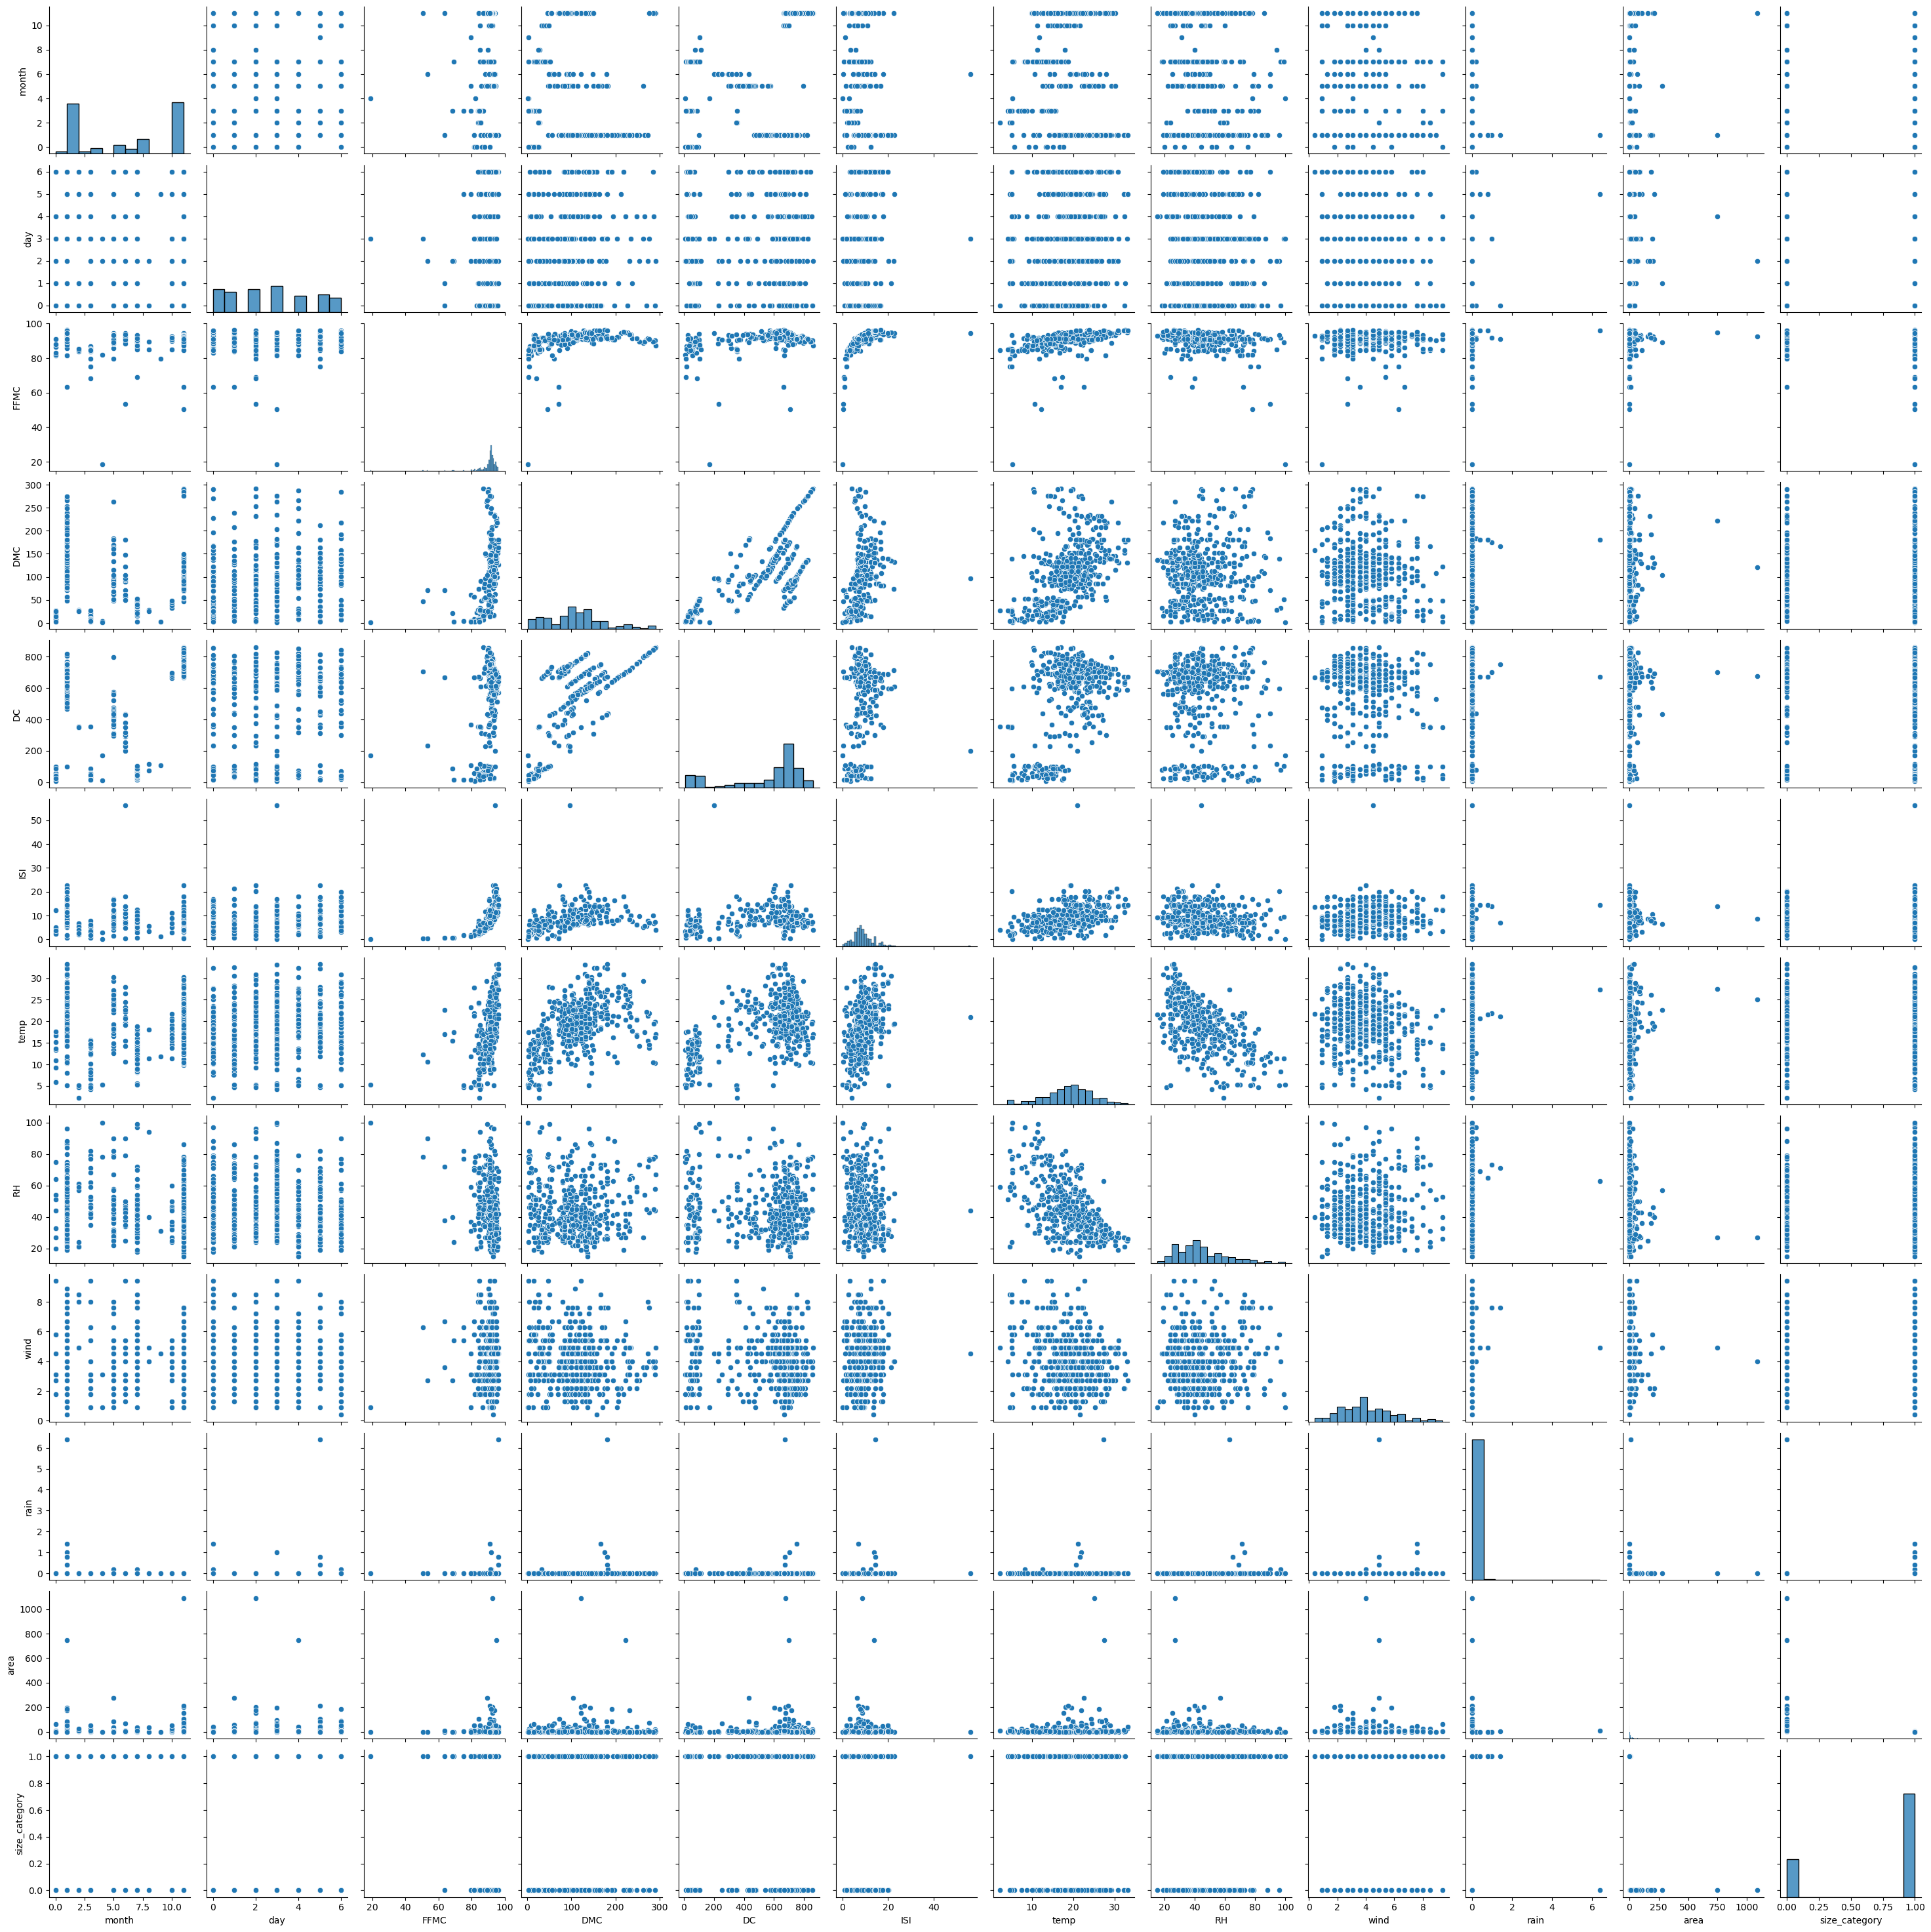

In [18]:
sns.pairplot(data2)
plt.show()

## Scaling

In [19]:
# Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
fire= norm_func(data2)
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,1.0
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,1.0
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,1.0


In [21]:
x=fire.iloc[:,:11]
x.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.7,0.0,0.0


In [22]:
y=fire.iloc[:,11:]
y.head(1)

,size_category
0,1.0


## Splitting Data

In [23]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3)

In [24]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((361, 11), (361, 1), (156, 11), (156, 1))

## Randomized Search CV

In [25]:
clf=SVC()
param_grid = [{'kernel':['poly'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=10)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 1/10; 1/10] END C=0.0001, gamma=0.01, kernel=poly;, score=0.730 total time=   0.0s
[CV 2/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 2/10; 1/10] END C=0.0001, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 3/10; 1/10] END C=0.0001, gamma=0.01, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 4/10; 1/10] END C=0.0001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 5/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 5/10; 1/10] END C=0.0001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 6/10; 1/10] START C=0.0001, gamma=0.01, kernel=poly.........................
[CV 6/10; 1/10] 

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 5/10; 2/10] START C=0.1, gamma=0.5, kernel=poly.............................
[CV 5/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 6/10; 2/10] START C=0.1, gamma=0.5, kernel=poly.............................
[CV 6/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 7/10; 2/10] START C=0.1, gamma=0.5, kernel=poly.............................
[CV 7/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 8/10; 2/10] START C=0.1, gamma=0.5, kernel=poly.............................
[CV 8/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 9/10; 2/10] START C=0.1, gamma=0.5, kernel=poly.............................
[CV 9/10; 2/10] END C=0.1, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 10/10; 2/10] START C=0.1, gamma=0.5, kernel=poly............................
[CV 10/10; 2/10]

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 6/10; 3/10] END C=10, gamma=0.5, kernel=poly;, score=0.750 total time=   0.0s
[CV 7/10; 3/10] START C=10, gamma=0.5, kernel=poly..............................
[CV 7/10; 3/10] END C=10, gamma=0.5, kernel=poly;, score=0.833 total time=   0.0s
[CV 8/10; 3/10] START C=10, gamma=0.5, kernel=poly..............................
[CV 8/10; 3/10] END C=10, gamma=0.5, kernel=poly;, score=0.750 total time=   0.0s
[CV 9/10; 3/10] START C=10, gamma=0.5, kernel=poly..............................
[CV 9/10; 3/10] END C=10, gamma=0.5, kernel=poly;, score=0.778 total time=   0.0s
[CV 10/10; 3/10] START C=10, gamma=0.5, kernel=poly.............................
[CV 10/10; 3/10] END C=10, gamma=0.5, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/10; 4/10] START C=10, gamma=0.01, kernel=poly.............................
[CV 1/10; 4/10] END C=10, gamma=0.01, kernel=poly;, score=0.730 total time=   0.0s
[CV 2/10; 4/10] START C=10, gamma=0.01, kernel=poly.............................
[CV 2/10; 4/10] END 

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 10/10; 4/10] END C=10, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 1/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 1/10; 5/10] END C=0.1, gamma=0.1, kernel=poly;, score=0.730 total time=   0.0s
[CV 2/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 2/10; 5/10] END C=0.1, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 3/10; 5/10] END C=0.1, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 4/10; 5/10] END C=0.1, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 5/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 5/10; 5/10] END C=0.1, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 6/10; 5/10] START C=0.1, gamma=0.1, kernel=poly.............................
[CV 6/10; 5/10]

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 7/10; 6/10] END C=0.001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 8/10; 6/10] START C=0.001, gamma=0.01, kernel=poly..........................
[CV 8/10; 6/10] END C=0.001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 9/10; 6/10] START C=0.001, gamma=0.01, kernel=poly..........................
[CV 9/10; 6/10] END C=0.001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 10/10; 6/10] START C=0.001, gamma=0.01, kernel=poly.........................
[CV 10/10; 6/10] END C=0.001, gamma=0.01, kernel=poly;, score=0.722 total time=   0.0s
[CV 1/10; 7/10] START C=0.0001, gamma=0.5, kernel=poly..........................
[CV 1/10; 7/10] END C=0.0001, gamma=0.5, kernel=poly;, score=0.730 total time=   0.0s
[CV 2/10; 7/10] START C=0.0001, gamma=0.5, kernel=poly..........................
[CV 2/10; 7/10] END C=0.0001, gamma=0.5, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/10; 7/10] START C=0.0001, gamma=0.5, kernel=poly........................

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 4/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 5/10; 8/10] START C=0.001, gamma=0.5, kernel=poly...........................
[CV 5/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 6/10; 8/10] START C=0.001, gamma=0.5, kernel=poly...........................
[CV 6/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 7/10; 8/10] START C=0.001, gamma=0.5, kernel=poly...........................
[CV 7/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 8/10; 8/10] START C=0.001, gamma=0.5, kernel=poly...........................
[CV 8/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 9/10; 8/10] START C=0.001, gamma=0.5, kernel=poly...........................
[CV 9/10; 8/10] END C=0.001, gamma=0.5, kernel=poly;, score=0.722 total time=   0.0s
[CV 10/10; 8/10] START C=0.001, gamma=0.5, kernel=poly..........................
[CV 

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV 1/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.730 total time=   0.0s
[CV 2/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly.........................
[CV 2/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly.........................
[CV 3/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly.........................
[CV 4/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 5/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly.........................
[CV 5/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 6/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly.........................
[CV 6/10; 10/10] END C=0.0001, gamma=0.1, kernel=poly;, score=0.722 total time=   0.0s
[CV 7/10; 10/10] START C=0.0001, gamma=0.1, kernel=poly..................

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['poly']}],
                   verbose=10)

In [26]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'poly', 'gamma': 0.5, 'C': 10}, 0.7977477477477477)

## Model

In [32]:
clf = SVC(kernel="poly",gamma=0.5,C=10)
clf.fit(x_train , y_train)
y_pred_train = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred_train)

Accuracy = 81.4404432132964


C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 31,  67],
       [  0, 263]], dtype=int64)

In [33]:
y_pred_val = clf.predict(x_val)
acc = accuracy_score(y_val, y_pred_val) * 100
print("Accuracy =", acc)
confusion_matrix(y_val, y_pred_val)

Accuracy = 83.33333333333334


array([[ 15,  26],
       [  0, 115]], dtype=int64)

In [37]:
# good accuracy for both training and validation data